In [ ]:
!pip install sdv pandas matplotlib seaborn numpy scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer
from sdv.evaluation.single_table import evaluate_quality
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load Credit Card Customers dataset
url = '/content/BankChurners.csv'
df = pd.read_csv(url)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Remove unnecessary columns
df.drop(columns=['CLIENTNUM'], inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Feature scaling
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

   Attrition_Flag  Customer_Age    Gender  Dependent_count  Education_Level  \
0        0.437506     -0.165406  1.059956         0.503368        -0.052637   
1        0.437506      0.333570 -0.943436         2.043199        -0.597678   
2        0.437506      0.583058  1.059956         0.503368        -0.597678   
3        0.437506     -0.789126 -0.943436         1.273283        -0.052637   
4        0.437506     -0.789126  1.059956         0.503368         1.037447   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0       -0.628128        -0.574182      -0.259473        0.384621   
1        0.727306         0.755053      -0.259473        1.010715   
2       -0.628128         0.090436      -0.259473        0.008965   
3        2.082739         0.755053      -0.259473       -0.241473   
4       -0.628128        -0.574182      -0.259473       -1.869317   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  0.763943     

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (8101, 20)
Test shape: (2026, 20)


In [ ]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=train_data)
print(metadata.to_dict())

{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1', 'columns': {'Attrition_Flag': {'sdtype': 'numerical'}, 'Customer_Age': {'sdtype': 'numerical'}, 'Gender': {'sdtype': 'numerical'}, 'Dependent_count': {'sdtype': 'numerical'}, 'Education_Level': {'sdtype': 'numerical'}, 'Marital_Status': {'sdtype': 'numerical'}, 'Income_Category': {'sdtype': 'numerical'}, 'Card_Category': {'sdtype': 'numerical'}, 'Months_on_book': {'sdtype': 'numerical'}, 'Total_Relationship_Count': {'sdtype': 'numerical'}, 'Months_Inactive_12_mon': {'sdtype': 'numerical'}, 'Contacts_Count_12_mon': {'sdtype': 'numerical'}, 'Credit_Limit': {'sdtype': 'numerical'}, 'Total_Revolving_Bal': {'sdtype': 'numerical'}, 'Avg_Open_To_Buy': {'sdtype': 'numerical'}, 'Total_Amt_Chng_Q4_Q1': {'sdtype': 'numerical'}, 'Total_Trans_Amt': {'sdtype': 'numerical'}, 'Total_Trans_Ct': {'sdtype': 'numerical'}, 'Total_Ct_Chng_Q4_Q1': {'sdtype': 'numerical'}, 'Avg_Utilization_Ratio': {'sdtype': 'numerical'}}}


In [ ]:
model = CTGANSynthesizer(metadata, epochs=200, verbose=True)
model.fit(train_data)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-2.87) | Discrim. (0.15): 100%|██████████| 200/200 [05:34<00:00,  1.67s/it]


In [ ]:
synthetic_data = model.sample(num_rows=len(test_data))
synthetic_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.428657,-0.166013,1.043506,2.003574,-0.042563,-1.915704,1.419670,-0.259473,-1.730892,-0.554943,-0.306794,0.489416,-0.129340,-1.426858,-0.424501,0.152287,-1.005094,1.356583,-1.455888,-0.957439
1,0.427448,-1.638410,-0.940626,0.516736,1.582489,0.707639,0.736297,-0.259473,-0.025315,0.115645,0.670220,0.480678,-0.791527,1.107370,-0.794657,0.644820,-0.206040,0.324086,-0.628152,1.243591
2,0.437506,-0.356584,1.036167,-0.263055,-0.050176,-0.604970,-1.903416,-0.250020,1.603722,-0.502068,0.683105,1.399472,0.415539,1.049742,0.310080,2.730763,-0.934401,0.632004,-0.485431,0.270203
3,0.421725,0.892869,1.045005,0.531050,0.523209,0.738499,-1.240353,-0.258848,1.012208,-0.517557,-1.283229,0.510581,-0.094582,-0.253156,2.701794,0.915981,0.931252,-1.565783,-0.726439,-0.673174
4,0.437506,1.093968,-0.935917,-1.805550,-0.571073,-0.631859,0.740219,-0.259473,1.361170,0.117082,-0.298790,-1.275724,-0.791527,0.225493,-0.821336,0.053836,0.044397,-0.322047,0.471901,0.988042


In [ ]:
quality_report = evaluate_quality(
    real_data=test_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

print('Synthetic Data Quality Score:', quality_report.get_score())

# Visualize Column Shapes
fig_shapes = quality_report.get_visualization(property_name='Column Shapes')
fig_shapes.show()

# Visualize Column Pair Trends
fig_trends = quality_report.get_visualization(property_name='Column Pair Trends')
fig_trends.show()


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 20/20 [00:00<00:00, 421.14it/s]|
Column Shapes Score: 78.65%

(2/2) Evaluating Column Pair Trends: |██████████| 190/190 [00:01<00:00, 127.08it/s]|
Column Pair Trends Score: 95.45%

Overall Score (Average): 87.05%

Synthetic Data Quality Score: 0.8704923787158806


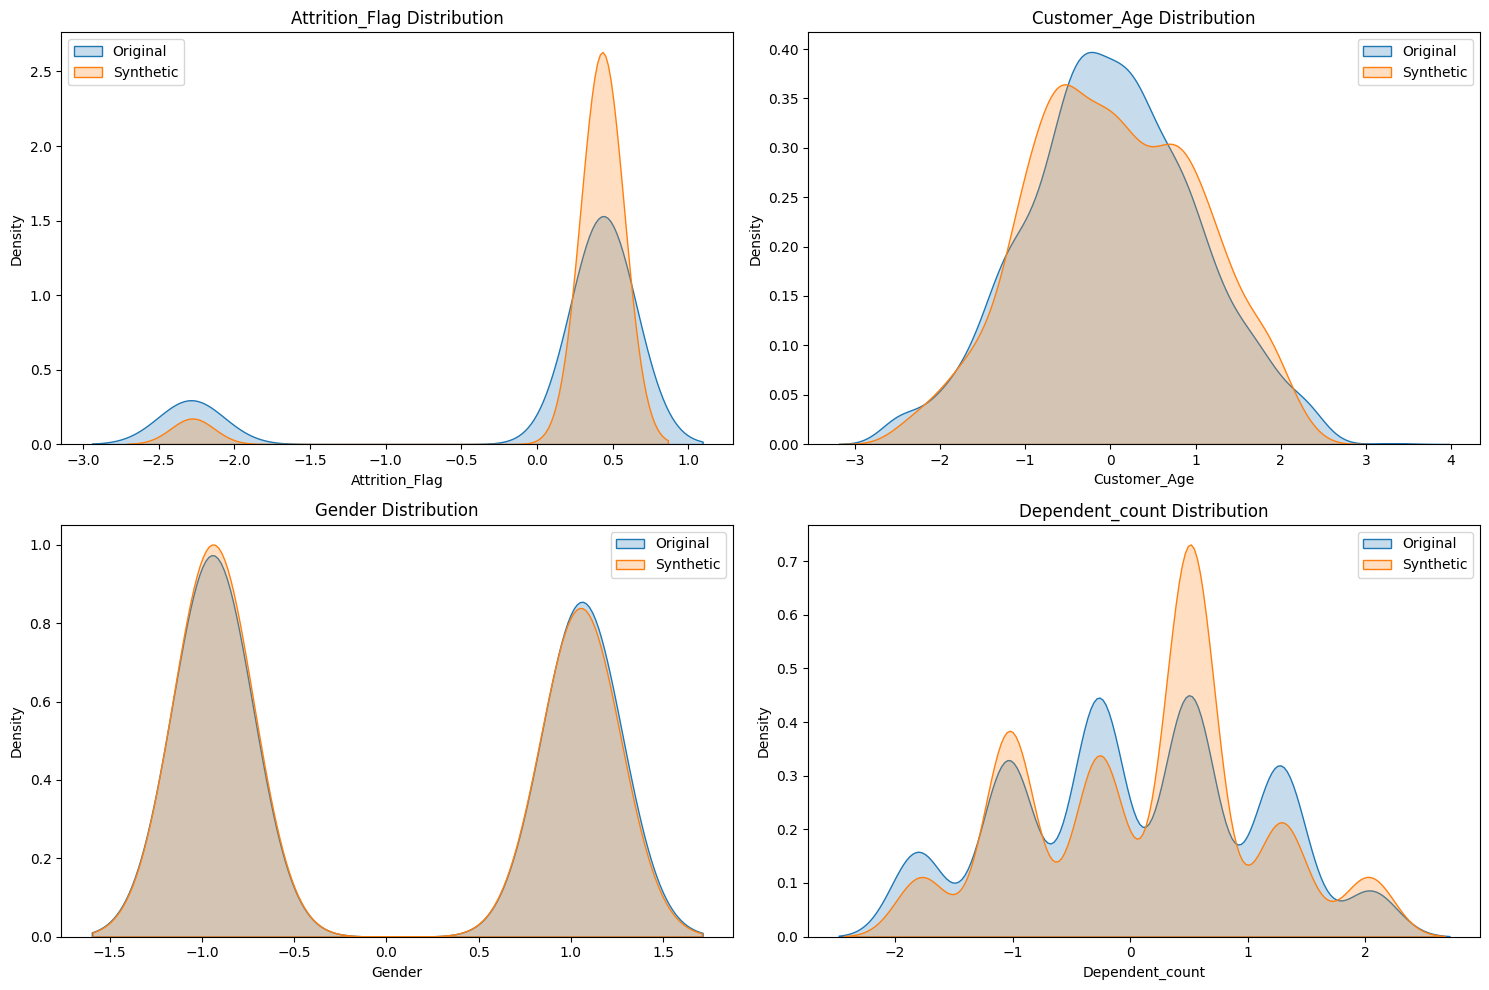

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
columns_to_compare = df.columns[:4]

for i, column in enumerate(columns_to_compare):
    sns.kdeplot(test_data[column], label='Original', ax=axes[i//2, i%2], fill=True)
    sns.kdeplot(synthetic_data[column], label='Synthetic', ax=axes[i//2, i%2], fill=True)
    axes[i//2, i%2].set_title(f'{column} Distribution')
    axes[i//2, i%2].legend()

plt.tight_layout()
plt.show()

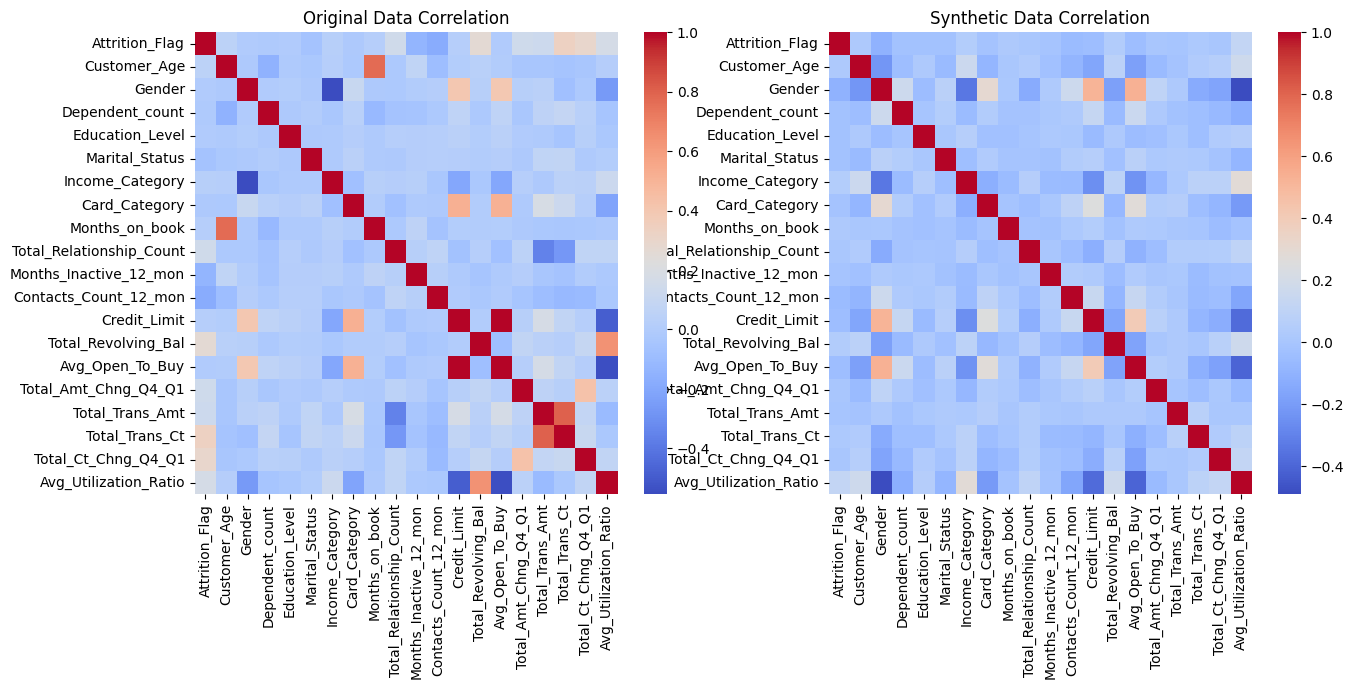

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(test_data.corr(), cmap='coolwarm', ax=axes[0])
axes[0].set_title('Original Data Correlation')

sns.heatmap(synthetic_data.corr(), cmap='coolwarm', ax=axes[1])
axes[1].set_title('Synthetic Data Correlation')
plt.show()

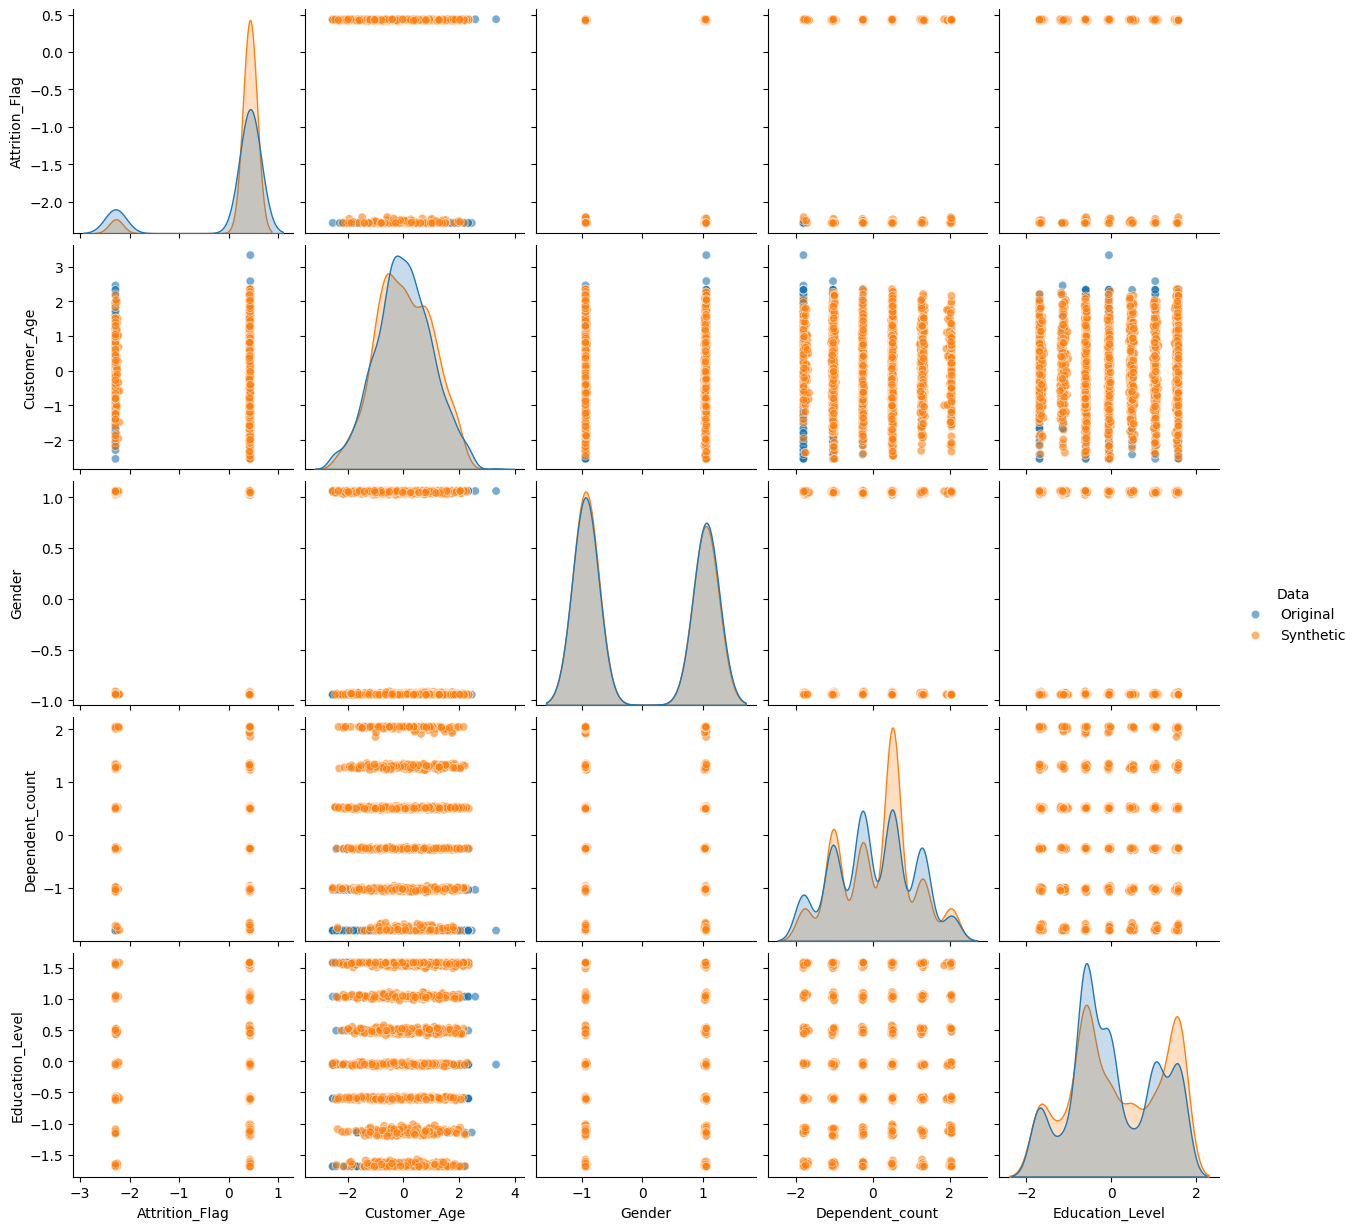

In [ ]:
sample_columns = df.columns[:5]
sns.pairplot(pd.concat([
    test_data[sample_columns].assign(Data='Original'),
    synthetic_data[sample_columns].assign(Data='Synthetic')]),
    hue='Data', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()